# 像素归一化

在opencv中使用`normalize`进行像素的归一化。opencv提供了四种归一化方法：`NORM_MINMAX`、`NORM_INF`、`NORM_L1`、`NORM_L2`。`NORM_MINMAX`比较常用，将像素指定在最大和最小的一个范围内进行规划。

> **归一化**：把数据变成(０，１)之间的小数。主要是为了数据处理方便提出来的，把数据映射到0～1范围之内处理，更加便捷快速。

[[151. 156. 158. ...  47.  46.  49.]
 [154. 159. 161. ...  48.  48.  49.]
 [157. 161. 163. ...  48.  47.  49.]
 ...
 [155. 152. 153. ... 109. 109. 110.]
 [153. 151. 147. ... 109. 109. 105.]
 [147. 144. 146. ... 109. 108. 107.]]


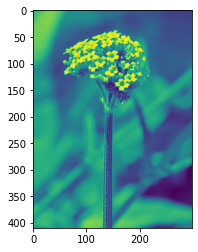

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

src = cv.imread('images/flower.png')
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
# 转换成浮点型
gray = np.float32(gray)
print(gray)


[[0.5873016  0.60714287 0.6150794  ... 0.17460318 0.17063493 0.18253969]
 [0.5992064  0.61904764 0.6269842  ... 0.17857143 0.17857143 0.18253969]
 [0.61111116 0.6269842  0.63492066 ... 0.17857143 0.17460318 0.18253969]
 ...
 [0.6031746  0.59126985 0.59523815 ... 0.42063496 0.42063496 0.4246032 ]
 [0.59523815 0.5873016  0.5714286  ... 0.42063496 0.42063496 0.40476194]
 [0.5714286  0.5595238  0.56746036 ... 0.42063496 0.4166667  0.41269845]]


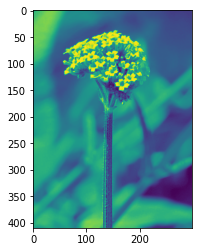

In [3]:
# 创建空白图像，dtype需与gray保持一致
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, norm_type=cv.NORM_MINMAX, alpha=0.0, beta=1.0)
print(dst)
plt.imshow(np.uint8(dst*255))

> 在 NORM_MINMAX 模式下，alpha表示归一化后的最小值，beta表示归一化后的最大值。

[[0.5921569  0.6117647  0.61960787 ... 0.18431373 0.18039216 0.19215688]
 [0.6039216  0.62352943 0.6313726  ... 0.18823531 0.18823531 0.19215688]
 [0.6156863  0.6313726  0.6392157  ... 0.18823531 0.18431373 0.19215688]
 ...
 [0.60784316 0.59607846 0.6        ... 0.427451   0.427451   0.43137258]
 [0.6        0.5921569  0.5764706  ... 0.427451   0.427451   0.41176474]
 [0.5764706  0.5647059  0.57254905 ... 0.427451   0.42352945 0.41960788]]


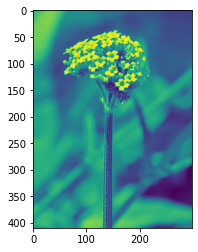

In [4]:
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, norm_type=cv.NORM_INF, alpha=1.0, beta=0.0)
print(dst)
plt.imshow(np.uint8(dst*255))

> 在NORM_L1、NORM_L2、NORM_INF 模式下，alpha表示执行相应归一化后矩阵的范数值，beta不使用。

[[0.00333002 0.00344029 0.00348439 ... 0.0010365  0.00101444 0.0010806 ]
 [0.00339618 0.00350644 0.00355055 ... 0.00105855 0.00105855 0.0010806 ]
 [0.00346234 0.00355055 0.00359466 ... 0.00105855 0.0010365  0.0010806 ]
 ...
 [0.00341823 0.00335207 0.00337413 ... 0.00240379 0.00240379 0.00242584]
 [0.00337413 0.00333002 0.00324181 ... 0.00240379 0.00240379 0.00231558]
 [0.00324181 0.00317565 0.00321975 ... 0.00240379 0.00238174 0.00235968]]


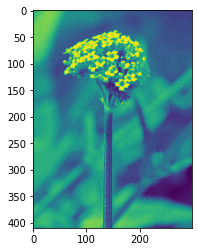

In [5]:
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, norm_type=cv.NORM_L2, alpha=1.0, beta=0.0)
print(dst)
plt.imshow(np.uint8(dst*10000))

In [6]:
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, norm_type=cv.NORM_L1, alpha=1.0, beta=0.0)
print(dst)
cv.imshow('l1', np.uint8(dst*10000000))
cv.waitKey(0)
cv.destroyAllWindows()

[[1.0278180e-05 1.0618517e-05 1.0754651e-05 ... 3.1991685e-06
  3.1311010e-06 3.3353033e-06]
 [1.0482382e-05 1.0822719e-05 1.0958854e-05 ... 3.2672360e-06
  3.2672360e-06 3.3353033e-06]
 [1.0686585e-05 1.0958854e-05 1.1094989e-05 ... 3.2672360e-06
  3.1991685e-06 3.3353033e-06]
 ...
 [1.0550450e-05 1.0346247e-05 1.0414315e-05 ... 7.4193481e-06
  7.4193481e-06 7.4874156e-06]
 [1.0414315e-05 1.0278180e-05 1.0005910e-05 ... 7.4193481e-06
  7.4193481e-06 7.1470786e-06]
 [1.0005910e-05 9.8017081e-06 9.9378422e-06 ... 7.4193481e-06
  7.3512806e-06 7.2832136e-06]]


> **关于`dst*10000`或`dst*1000000`的理解**
>
> @高厚泥：因为MinMax和INF归一化后最大值一定有1,所以*255就会将所有的数re-scale到0-255，但L1和L2归一化的结果只是在0-1范围内，最大值不一定是1，所以如果*255也不一定会把它re-scale到0-255区间，所以我们需要乘以很大的数，这样虽然值超过了255，但由于是字节型数据，最大值只能是255，这里的10000000和10000是根据具体图像的归一化后的scale范围取的，你在做实验的时候不一定要这两个值，可以改，但一定要确保re-scale之后所有的值都在0-255区间。

